<a href="https://colab.research.google.com/github/sunshineluyao/CV_ML/blob/master/Data2020/BTC_AutomatedTrading_PUR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Object-Oriented Programming in Python: State and Behavior](https://campus.datacamp.com/courses/object-oriented-programming-in-python)

# Define Class Functions

In [40]:
class PUR:
  def __init__(self, PUR_low, PUR_high,Start_date):
    self.low = PUR_low
    self.high = PUR_high
    self.start = Start_date
  def signals(self, URL):
    import pandas as pd 
    import numpy as np
    data=pd.read_csv(URL,index_col='Unnamed: 0')
    data.index=pd.to_datetime(data.index)
    data = data[data.index>=self.start]
    signals = pd.DataFrame(index=data.index)
    signals['PriceUSD'] = data['PriceUSD']
    signals['PU Ratio'] = data['PU Ratio']
    signals['signal'] = signals['PU Ratio'].apply(lambda x: 1 if x<self.low else -1 if x>self.high else 0)
    signals=signals.dropna()
    return signals


  def positions(self, volume,signals):
      import pandas as pd 
      import numpy as np
      positions = pd.DataFrame(index=signals.index,columns=['Q']).fillna(0.0)
      duration =len(positions.index)
      for i in range(duration):
        index=i
        if index == 0:
          if signals['signal'][index]==1:
            positions['Q'][index]=volume
          else:
            positions['Q'][index]=0
        elif index>0:
          index_last = index-1
          if positions['Q'][index_last]==volume:
            if signals['signal'][index]==-1:  #sell only if there is a sell signal 
              positions['Q'][index]=0
            else:
              positions['Q'][index]=volume
          elif positions['Q'][index_last]==0:
            if signals['signal'][index]==1:
              positions['Q'][index]=volume
            else:
              positions['Q'][index]=0
      return positions

  def portfolio(self, initial_capital, positions):
      import pandas as pd 
      import numpy as np
      pos_diff= positions.diff()
      pos_diff.iloc[0]=positions.iloc[0]
      portfolio = pd.DataFrame(index=signals.index,columns=['holdings']).fillna(0.0)
      portfolio['holdings'] = positions['Q'].multiply(signals['PriceUSD'],axis=0)
      portfolio['cash'] = initial_capital - (pos_diff['Q'].multiply(signals['PriceUSD'], axis=0)).cumsum()-((pos_diff['Q'].multiply(signals['PriceUSD'], axis=0)).abs()*0.001).cumsum()
      portfolio['total'] = portfolio['cash'] + portfolio['holdings']
      return portfolio
  
  def signal_figure(self,signals, positions):
    import pandas as pd 
    import numpy as np
    pos_diff= positions.diff()
    pos_diff.iloc[0]=positions.iloc[0]
    pos_diff['PU Ratio']=signals['PU Ratio']
    import matplotlib.pyplot as plt
    fig, ax1 =plt.subplots()

        # Plot the buy signals
    ax1.plot(pos_diff.loc[pos_diff.Q == volume].index, pos_diff['PU Ratio'].loc[pos_diff.Q == volume], '^', markersize=20, color='green')
         # Plot the sell signals
    ax1.plot(pos_diff.loc[pos_diff.Q == -volume].index, pos_diff['PU Ratio'].loc[pos_diff.Q == -volume],'v', markersize=20, color='red')
    ax1=pos_diff['PU Ratio'].plot(ax=ax1, color='blue', lw=2.,figsize=(14, 10),legend=True)
    return

  def portfolio_figure(self,portfolio):
    import matplotlib.pyplot as plt
    plt.style.use('seaborn-bright')
    portfolio[['holdings', 'cash', 'total']].plot(figsize=(14, 10),legend=True)
  def ROI(self, portfolio):
    ROI = portfolio['total'].iloc[-1]/initial_capital-1
    return ROI

# Generate result by defining parameters

In [41]:
###show all columns
import pandas as pd 
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### please provide the URL of the data

In [42]:
URL = 'https://raw.githubusercontent.com/sunshineluyao/CVML2021/main/BTC_2020_12_31.csv'

In [43]:
data=pd.read_csv(URL,index_col='Unnamed: 0')
data.index=pd.to_datetime(data.index)

### please define the short and long window

In [44]:
PUR= PUR(PUR_low=61,PUR_high=119, Start_date="2013-12-27")

### print the signal table

In [45]:
signals= PUR.signals(URL)
signals.head()

,PriceUSD,PU Ratio,signal
2013-12-27,722.570567,141.627877,-1
2013-12-28,715.852363,137.388352,-1
2013-12-29,727.271216,140.924057,-1
2013-12-30,735.741997,142.994022,-1
2013-12-31,729.557583,139.489480,-1


# print the position and portfolio table

In [46]:
volume=100
positions = PUR.positions(volume, signals)
positions.tail()

,Q
2020-12-27,100.0
2020-12-28,100.0
2020-12-29,100.0
2020-12-30,100.0
2020-12-31,100.0


In [47]:
initial_capital = 100000
portfolio = PUR.portfolio(initial_capital, positions)
portfolio.head()

,holdings,cash,total
2013-12-27,0.0,100000.0,100000.0
2013-12-28,0.0,100000.0,100000.0
2013-12-29,0.0,100000.0,100000.0
2013-12-30,0.0,100000.0,100000.0
2013-12-31,0.0,100000.0,100000.0


In [48]:
portfolio.tail()

,holdings,cash,total
2020-12-27,2.643086e+06,772549.44469,3.415635e+06
2020-12-28,2.703935e+06,772549.44469,3.476484e+06
2020-12-29,2.723120e+06,772549.44469,3.495670e+06
2020-12-30,2.884461e+06,772549.44469,3.657011e+06
2020-12-31,2.902267e+06,772549.44469,3.674817e+06


### virtualize portfolio return 

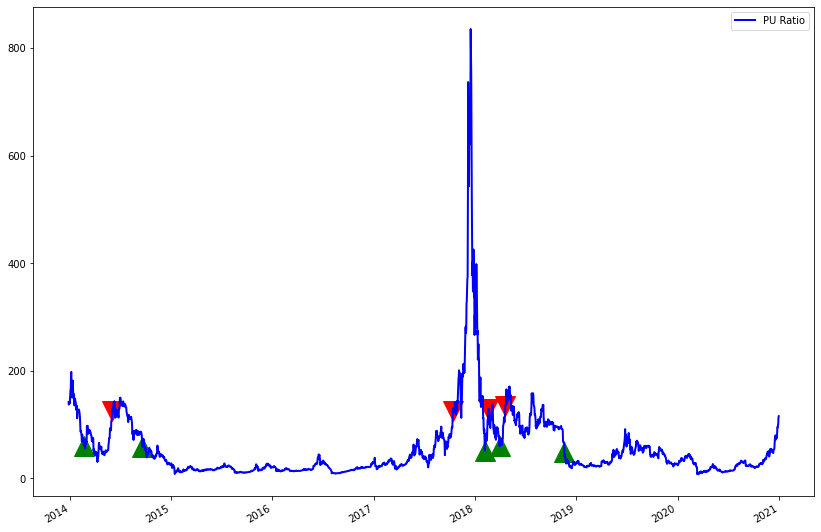

In [49]:
PUR.signal_figure(signals, positions)

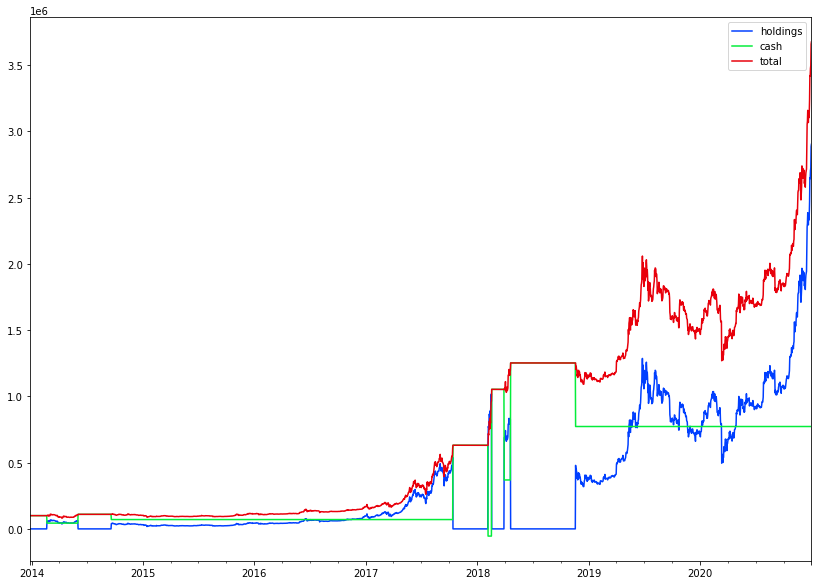

In [50]:
PUR.portfolio_figure(portfolio)

In [51]:
PUR.ROI(portfolio)

35.74816585952544

In [52]:
data=pd.read_csv(URL,index_col='Unnamed: 0')
data.index=pd.to_datetime(data.index)
data = data[data.index>='2013-12-27']
data.head()

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,FeeMedUSD,FeeTotNtv,FeeTotUSD,HashRate,IssContNtv,IssContPctAnn,IssContUSD,IssTotNtv,IssTotUSD,NVTAdj,NVTAdj90,PriceBTC,PriceUSD,ROI1yr,ROI30d,SplyCur,SplyExpFut10yrCMBI,SplyFF,TxCnt,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d,Volume,Annualized_DilutionRate,Total daily transaction volume,Velocity,The daily revenue of bitcoin miners,The accumulated revenue of bitcoin miners,P/E Ratio,Metcalfe,PM,<1d,1d ~ 1m,1m ~ 1q,1q ~ 6m,6m ~ 1y,1y ~ 2y,2y ~ 3y,3y ~ 4y,4y ~ 5y,5y~10y,>10y,One-year staking ratio,Two-year staking ratio,Three-year staking ratio,Four-year staking ratio,Five-year staking ratio,Ten-year staking ratio,Token Utility,PU Ratio,volatility30,volatility60,volatility90,volatility180,Token Utility_volatility,PU Ratio_volatility
2013-12-27,128876.0,184.0,27580638.0,149894.771739,2.698817,8.803070e+09,3.261825e+09,1.180923e+09,0.000235,0.169524,0.0001,0.072257,12.550798,9068.837060,10801.537922,4600.0,13.781510,3.323825e+06,4600.0,3.323825e+06,66.799456,54.236644,1.0,722.570567,5292.598091,-24.959742,1.218299e+07,19455787.50,1.218038e+07,53496.0,136699.0,182381.572470,1.317836e+08,4.416470,3191.211204,0.040000,28.902823,603727.026868,4.362354e+08,0.070562,0.119312,0.106722,32505800.0,13.659174,1.642894e+08,1.853790,3.332893e+06,3.349423e+08,7.236355,1.660902e+10,4.350470,0.011737,0.192356,0.188828,0.072711,0.158448,0.079035,0.128666,0.079069,0.089150,0.0,0.0,0.375920,0.296885,0.168219,0.089150,0.0,0.0,5.101895,141.627877,0.119312,0.106722,0.092849,0.070562,3.516349,205.488886
2013-12-28,112555.0,150.0,25974090.0,173160.600000,2.671271,8.723906e+09,3.265827e+09,1.180923e+09,0.000245,0.175328,0.0001,0.071585,11.435880,8186.401958,8805.601567,3750.0,11.231470,2.684446e+06,3750.0,2.684446e+06,90.091399,53.496043,1.0,715.852363,5220.144022,-28.939698,1.218674e+07,19456725.00,1.218413e+07,46692.0,116433.0,135270.845743,9.683395e+07,4.565400,3268.152093,0.038060,27.245341,531563.171814,3.805208e+08,0.070269,0.118864,0.106767,19011300.0,13.577599,1.158453e+08,1.881827,2.692633e+06,3.376349e+08,8.876485,1.266863e+10,5.650591,0.007746,0.186628,0.198537,0.072683,0.158467,0.079033,0.128676,0.078901,0.089328,0.0,0.0,0.375938,0.296905,0.168230,0.089328,0.0,0.0,5.210430,137.388352,0.118864,0.106767,0.092882,0.070269,3.606153,198.508609
2013-12-29,129208.0,168.0,29348789.0,174695.172619,2.709952,8.866120e+09,3.271689e+09,1.180923e+09,0.000281,0.204610,0.0001,0.072727,14.393047,10467.648709,9862.273755,4200.0,12.574912,3.054539e+06,4200.0,3.054539e+06,91.442788,54.133910,1.0,727.271216,5337.946805,-35.567042,1.219094e+07,19457775.00,1.218833e+07,51159.0,121618.0,133317.673491,9.695811e+07,6.713229,4882.337860,0.027000,19.636323,816449.424964,5.937802e+08,0.070185,0.116634,0.106540,20707700.0,13.560446,1.176658e+08,1.862195,3.065007e+06,3.406999e+08,7.925183,1.669471e+10,4.356298,0.007438,0.181693,0.203624,0.072844,0.158599,0.079057,0.128602,0.078658,0.089486,0.0,0.0,0.375803,0.296746,0.168144,0.089486,0.0,0.0,5.160731,140.924057,0.116634,0.106540,0.092837,0.070185,3.576035,203.373654
2013-12-30,152090.0,173.0,30223167.0,174700.387283,2.739735,8.972568e+09,3.274977e+09,1.180923e+09,0.000213,0.156547,0.0001,0.073574,11.692365,8602.563954,10155.793808,4325.0,12.944573,3.182084e+06,4325.0,3.182084e+06,59.786430,54.407268,1.0,735.741997,5372.229394,-34.267475,1.219526e+07,19458856.25,1.219265e+07,54952.0,159652.0,203980.483090,1.500770e+08,4.616095,3396.254601,0.018587,13.675575,736968.722416,5.422188e+08,0.069460,0.116728,0.106546,20897300.0,13.548155,1.709743e+08,1.855325,3.190687e+06,3.438906e+08,7.704417,2.313137e+10,3.180711,0.012813,0.174163,0.205532,0.072494,0.159275,0.079047,0.128556,0.078501,0.089618,0.0,0.0,0.375723,0.296676,0.168120,0.089618,0.0,0.0,5.145264,142.994022,0.116728,0.106546,0.092837,0

In [53]:
Low_Set = np.arange(60,80,1)
High_Set = np.arange(100,120,1)

In [54]:
def ROI_PU(PUR_low, PUR_high):
    import pandas as pd 
    import numpy as np
    signals = pd.DataFrame(index=data.index)
    signals['PriceUSD'] = data['PriceUSD']
    signals['PU Ratio'] = data['PU Ratio']
    signals['signal'] = signals['PU Ratio'].apply(lambda x: 1 if x<PUR_low else -1 if x>PUR_high else 0)
    signals=signals.dropna()
    positions = pd.DataFrame(index=signals.index,columns=['Q']).fillna(0.0)
    duration =len(positions.index)
    for i in range(duration):
      index=i
      if index == 0:
       if signals['signal'][index]==1:
         positions['Q'][index]=volume
       else:
         positions['Q'][index]=0
      elif index>0:
        index_last = index-1
        if positions['Q'][index_last]==volume:
          if signals['signal'][index]==-1: 
            positions['Q'][index]=0
          else:
            positions['Q'][index]=volume
        elif positions['Q'][index_last]==0:
          if signals['signal'][index]==1:
            positions['Q'][index]=volume
          else:
              positions['Q'][index]=0
    pos_diff= positions.diff()
    pos_diff.iloc[0]=positions.iloc[0]
    portfolio = pd.DataFrame(index=signals.index,columns=['holdings']).fillna(0.0)
    portfolio['holdings'] = positions['Q'].multiply(signals['PriceUSD'],axis=0)
    portfolio['cash'] = initial_capital - (pos_diff['Q'].multiply(signals['PriceUSD'], axis=0)).cumsum()-((pos_diff['Q'].multiply(signals['PriceUSD'], axis=0)).abs()*0.001).cumsum()
    portfolio['total'] = portfolio['cash'] + portfolio['holdings']
    ROI = portfolio['total'].iloc[-1]/initial_capital-1
    return ROI

In [55]:
Objectives =pd.DataFrame(columns=['PUR_low','PUR_high','ROI'])
for low in Low_Set:
  for high in High_Set:
    ROI =ROI_PU(low,high)
    Objectives=Objectives.append({'PUR_low': low, 'PUR_high': high, 'ROI':ROI}, ignore_index=True)
Objectives.head()

,PUR_low,PUR_high,ROI
0,60.0,100.0,30.718618
1,60.0,101.0,32.330415
2,60.0,102.0,32.330415
3,60.0,103.0,32.330415
4,60.0,104.0,32.330415


In [56]:
Objectives.iloc[Objectives['ROI'].idxmax()]

PUR_low      61.000000
PUR_high    119.000000
ROI          35.748166
Name: 39, dtype: float64